<a href="https://colab.research.google.com/github/a-aditya-jain/Robo-main-task/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install google_play_scraper

In [ ]:
from google_play_scraper import app, Sort, reviews_all

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

g_reviews = reviews_all(
        "com.avira.passwordmanager",
        sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='us', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    )


g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

g_df2.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2['laguage_code'] = 'en'
g_df2['country_code'] = 'us'

result = g_df2
result.to_csv("grev.csv", index=False)


In [ ]:
pip install nltk

In [ ]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving grev.csv to grev (1).csv


In [ ]:
df = pd.read_csv('grev (1).csv')
df['review_description']

0      Apparently, the avira password manager does no...
1      Avira is an excellent, easy to use password ma...
2      They make you to subscribe premium with passwo...
3                                              Perfect 👍
4      Pretty straight forward to use, but, on some a...
                             ...                        
714    This app is a life changer! You will wonder ho...
715                                         Very useful!
716    Comfortable way to sync my passwords on all my...
717                                           Great app!
718                                          Awesome app
Name: review_description, Length: 719, dtype: object

In [ ]:

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

df['review_description'] = df['review_description'].apply(preprocess_text)
df['review_description']

0      apparently , avira password manager save passw...
1      avira excellent , easy use password manager st...
2      make subscribe premium password locked . unabl...
3                                              perfect 👍
4      pretty straight forward use , , apps auto fill...
                             ...                        
714    app life changer ! wonder survived without ! a...
715                                             useful !
716               comfortable way sync password device .
717                                          great app !
718                                          awesome app
Name: review_description, Length: 719, dtype: object

In [ ]:


analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment
count=[0,0]
df['sentiment'] = df['review_description'].apply(get_sentiment)

df['review_description']
for item in df['sentiment'] :
  if item == 1 :
    count[1] = count[1] + 1
  else :
    count[0] = count[0] + 1
print(count[1],count[0])

df['sentiment'][0]


573 146


1

In [ ]:
print("positive reviews are : " , count[1])
print("negative reviews are : " , count[0])

positive reviews are :  573
negative reviews are :  146


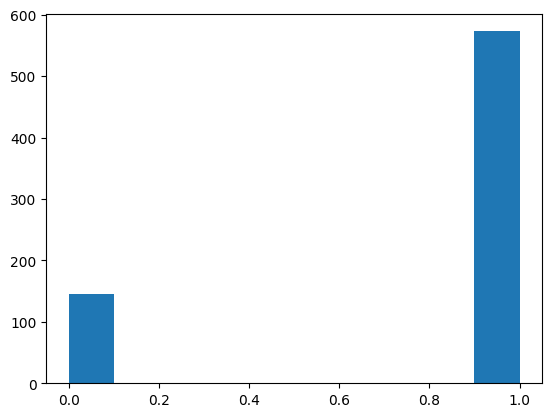

In [ ]:
plt.hist(df['sentiment'])
plt.show()